In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(xt, yt), (xts, yts) = mnist.load_data()
xt = xt.reshape(60000, 28, 28, 1).astype('float32') / 255
xts = xts.reshape(10000, 28, 28, 1).astype('float32') / 255
nc = 10
yt = to_categorical(yt, num_classes=nc)
yts = to_categorical(yts, num_classes=nc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [3]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nc, activation='softmax'))
    return model

In [4]:
optimizers = ['adam', 'adagrad', 'adadelta', 'adamax', 'nadam']
history = {}

In [5]:
for optim in optimizers:
    model = create_model()
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
    history[optim] = model.fit(xt, yt, epochs=5, batch_size=64, validation_data=(xts, yts))

c:\Users\midhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8710 - loss: 0.4163 - val_accuracy: 0.9806 - val_loss: 0.0612
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9864 - val_loss: 0.0399
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9870 - loss: 0.0401 - val_accuracy: 0.9892 - val_loss: 0.0313
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9907 - val_loss: 0.0314
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3519 - loss: 2.1785 - val_accuracy: 0.7604 - val_loss: 1.0438
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7910 - loss: 0.7981 - val_accuracy: 0.8686 - val_loss: 0.4485
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8690 - loss: 0.4415 - val_accuracy: 0.8

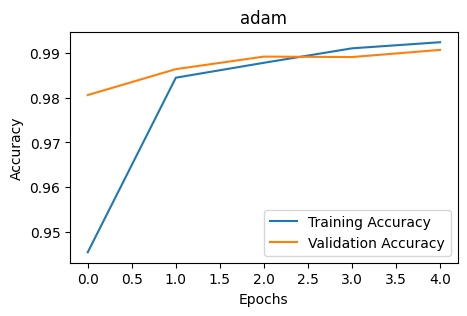

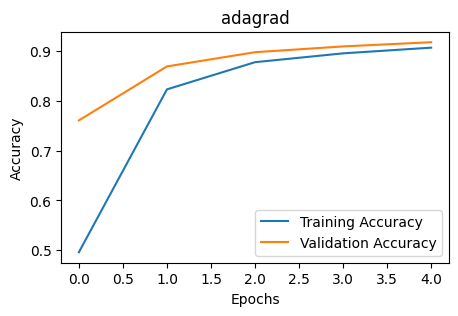

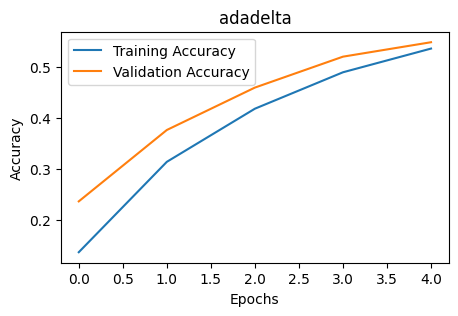

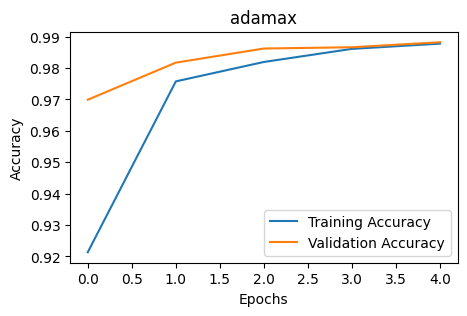

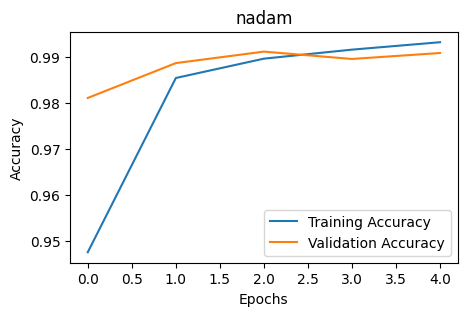

: 

In [6]:
for optim in optimizers:
    plt.figure(figsize=(5, 3))
    plt.plot(history[optim].history['accuracy'], label='Training Accuracy')
    plt.plot(history[optim].history['val_accuracy'], label='Validation Accuracy')
    plt.title(optim)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.show()